# book recommendation system using clustering/collaborative filtering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## books dataframe


In [2]:
books = pd.read_csv('Book Dataset/Books.csv', error_bad_lines = False, encoding='latin-1')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
books.shape

(271360, 8)

In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [6]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [7]:
books.rename(columns={
    "Book-Title": "title",
    "Book-Author":"author",
    "Year-Of-Publication":"year",
    "Publisher":"publisher",
    "Image-URL-L":"img_url"}, inplace=True)

In [8]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


## Users dataframe

In [9]:
users = pd.read_csv('Book Dataset/Users.csv',error_bad_lines = False, encoding='latin-1')

In [10]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
users.shape

(278858, 3)

## Ratings dataframe

In [12]:
ratings = pd.read_csv('Book Dataset/Ratings.csv',error_bad_lines = False, encoding='latin-1')

In [13]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
ratings.shape

(1149780, 3)

In [15]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


## Data Analysis

Text(0.5, 1.0, 'Top 10 Authors')

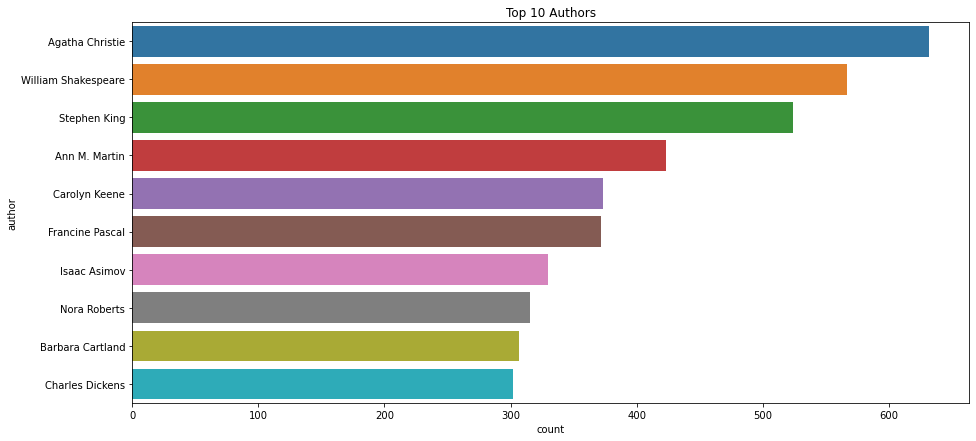

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(y='author',data=books,order=pd.value_counts(books['author']).iloc[:10].index)
plt.title('Top 10 Authors')
#Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

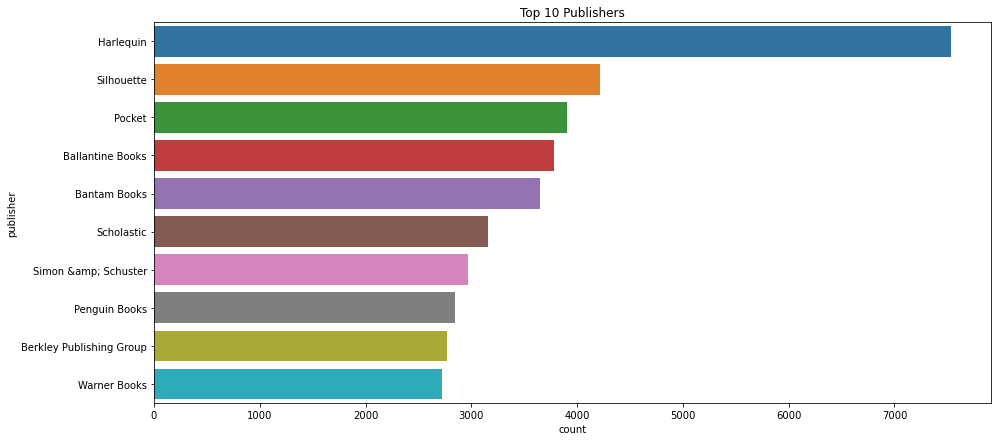

In [17]:

plt.figure(figsize=(15,7))
sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

Text(0.5, 1.0, 'Count of users Country wise')

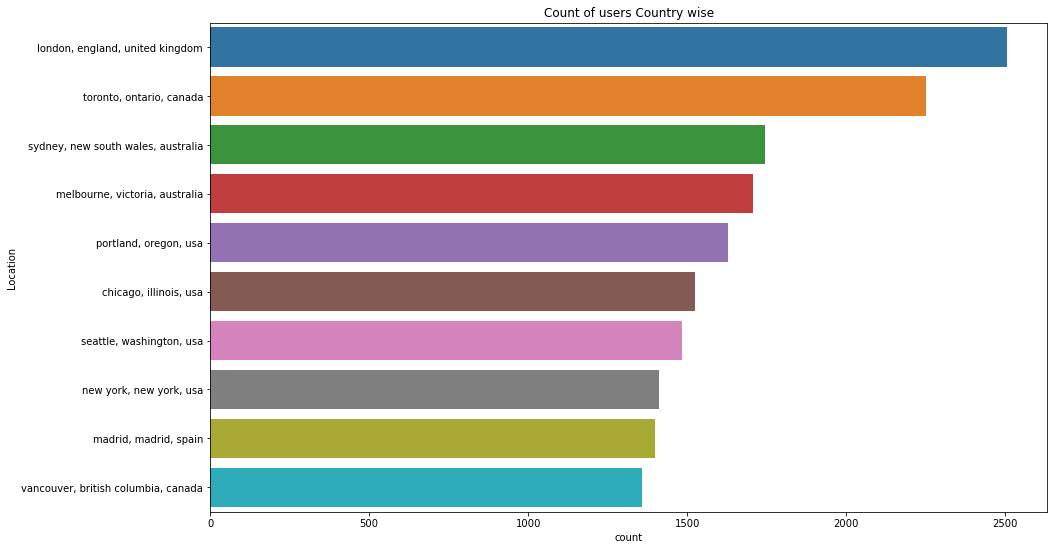

In [18]:
plt.figure(figsize=(15,9))
sns.countplot(y='Location',data=users,order=pd.value_counts(users['Location']).iloc[:10].index)
plt.title('Count of users Country wise')

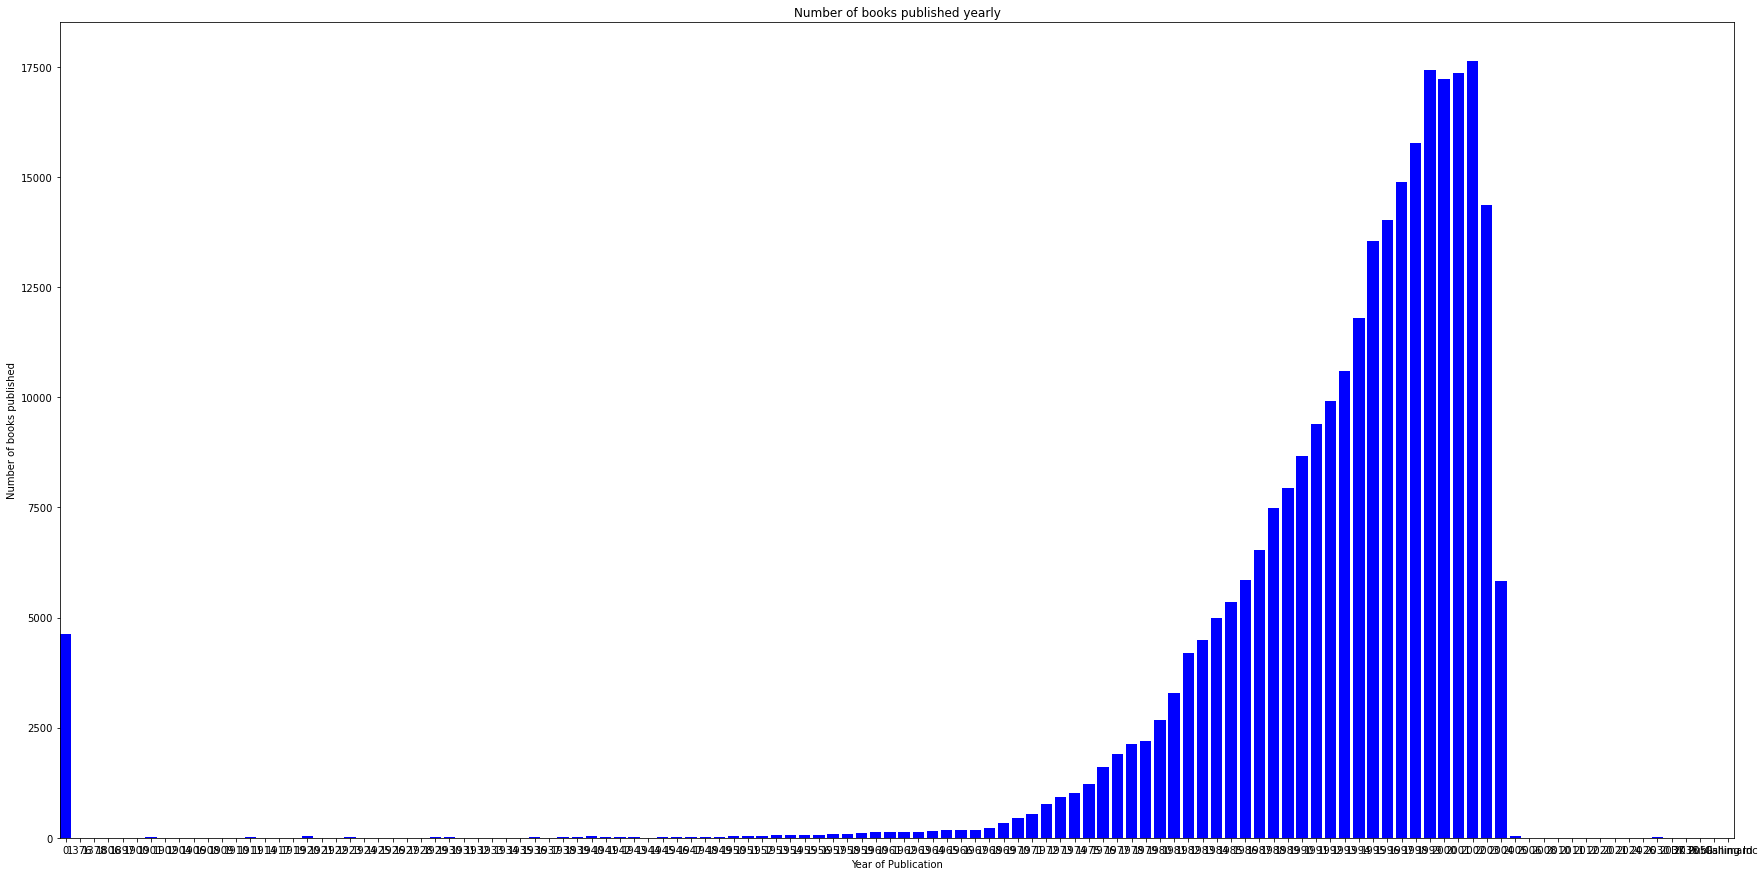

In [19]:
publications = {}
for year in books['year']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(30, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

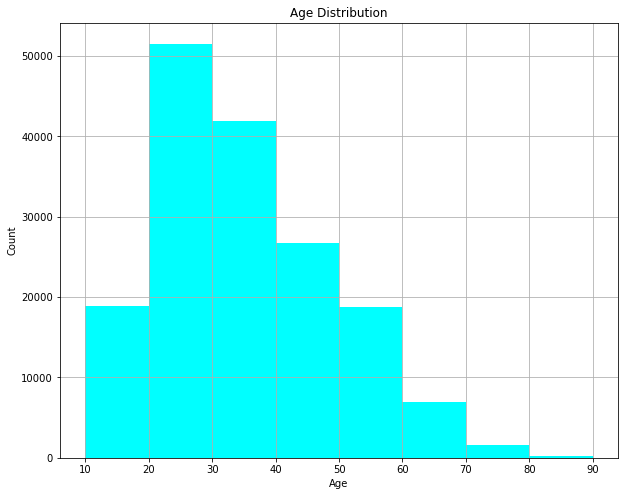

In [20]:
plt.figure(figsize=(10,8))
users.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [21]:
ratings.rename(columns={
    "User-ID":"user-id",
    "Book-Rating":"rating"
}, inplace=True)

In [22]:
ratings.head(5)

,user-id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [23]:
ratings['user-id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: user-id, Length: 105283, dtype: int64

In [24]:
ratings['user-id'].unique().shape

(105283,)

In [25]:
x = ratings['user-id'].value_counts()>200

In [26]:
x[x].shape

(899,)

In [27]:
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183, 155916,  44296,  73681,  59727,  28634, 188951,   9856,
            268622, 274808],
           dtype='int64', length=899)

In [28]:
ratings = ratings[ratings['user-id'].isin(y)]

In [29]:
ratings.head()

,user-id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [30]:
ratings.shape

(526356, 3)

In [31]:
ratings_with_books = ratings.merge(books, on = "ISBN")
ratings_with_books

,user-id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?ÃÂ¤fin SchÃ?ÃÂ¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...


In [32]:
ratings_with_books.shape

(487671, 8)

In [33]:
num_rating  = ratings_with_books.groupby("title")['rating'].count().reset_index()
num_rating.rename(columns={"rating":"num_of_rating"}, inplace = True)

In [34]:
num_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [35]:
ratings_with_books.head()

,user-id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [36]:
final_rating = ratings_with_books.merge(num_rating, on = 'title')

In [37]:
final_rating.head(2)

,user-id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [38]:
final_rating.shape

(487671, 9)

In [39]:
final_rating = final_rating[final_rating['num_of_rating']>=50]

In [40]:
final_rating.head()

,user-id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [41]:
final_rating.sample(10)

,user-id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
118324,128696,0312201656,0,I Capture the Castle,Dodie Smith,1999,St. Martin's Griffin,http://images.amazon.com/images/P/0312201656.0...,66
62964,85526,0060958022,9,Five Quarters of the Orange,Joanne Harris,2002,Perennial,http://images.amazon.com/images/P/0060958022.0...,79
102996,217375,0061097101,0,The Saving Graces: A Novel,Patricia Gaffney,2000,HarperTorch,http://images.amazon.com/images/P/0061097101.0...,76
14,44728,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
138101,11676,0425167313,8,Here on Earth,Alice Hoffman,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425167313.0...,88
70488,210485,0345337662,0,Interview with the Vampire,Anne Rice,1993,Ballantine Books,http://images.amazon.com/images/P/0345337662.0...,177
3771,16634,0380718332,0,All That Remains (Kay Scarpetta Mysteries (Pap...,Patricia D. Cornwell,1993,Avon,http://images.amazon.com/images/P/0380718332.0...,84
99429,254465,0312976275,0,Hot Six : A Stephanie Plum Novel (A Stephanie ...,Janet Evanovich,2001,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312976275.0...,99
102825,164027,0060922532,0,Pigs in Heaven,Barbara Kingsolver,1994,Perennial,http://images.amazon.com/images/P/0060922532.0...,93
108541,141710,0385500769,0,A Map of the World,Jane Hamilton,1999,Doubleday Books,http://images.amazon.com/images/P/0385500769.0...,119


In [42]:
final_rating.shape

(61853, 9)

In [43]:
final_rating.drop_duplicates(['title','user-id'], inplace = True)

In [44]:
final_rating.shape

(59850, 9)

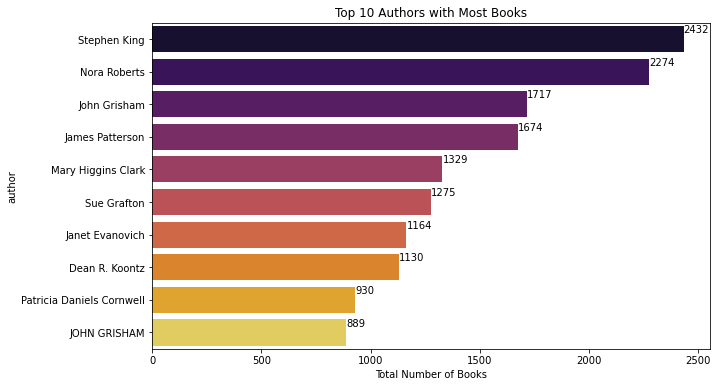

In [45]:
# Group by author and count the number of books for each author
author_books_count = final_rating.groupby('author')['title'].count().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=author_books_count.values, y=author_books_count.index, palette='inferno')
ax.set_title("Top 10 Authors with Most Books")
ax.set_xlabel("Total Number of Books")

# Add counts to the bars
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())))

plt.show()

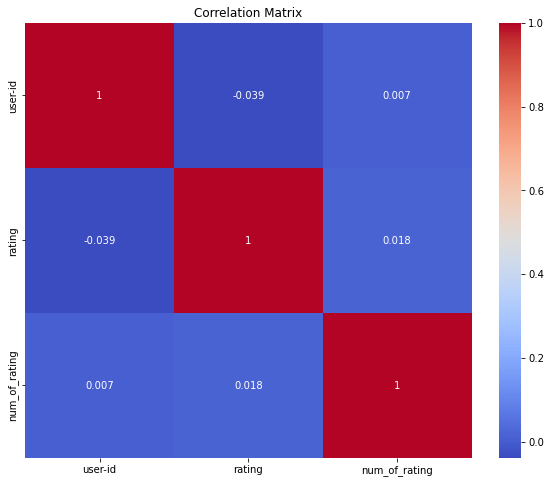

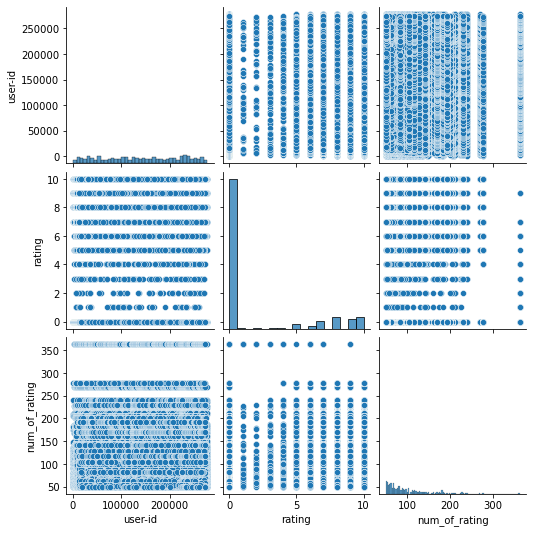

In [46]:
numeric_columns = final_rating.select_dtypes(include='number')

# Correlation matrix with seaborn
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot with seaborn
sns.pairplot(numeric_columns)
plt.show()


[]

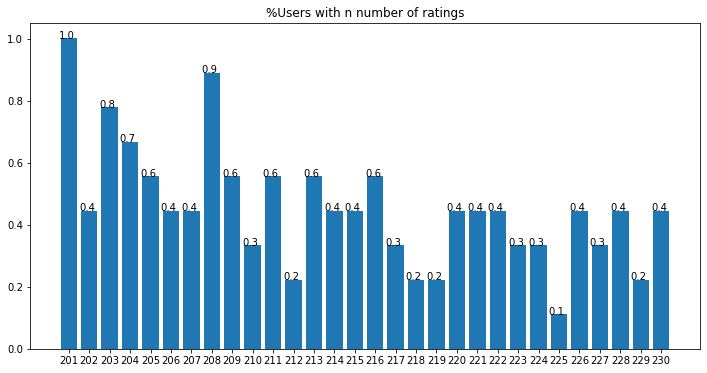

In [76]:
users_rating_count = ratings['user-id'].value_counts()

user_with_nratings = pd.Series(users_rating_count).value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar( user_with_nratings.index[:30], 100*user_with_nratings.values[:30]/user_with_nratings.values.sum() )
plt.xticks(user_with_nratings.index[:30])

for i in range(len(user_with_nratings.index[:30])):
    plt.text(user_with_nratings.index[i]-0.5
             , 100*user_with_nratings.values[i]/user_with_nratings.values.sum()
             , round(100*user_with_nratings.values[i]/user_with_nratings.values.sum() ,1)
            )
plt.title('%Users with n number of ratings')
plt.plot()

In [47]:
book_pivot = final_rating.pivot_table(columns="user-id", index='title', values = 'rating')

In [48]:
book_pivot

user-id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [49]:
book_pivot.fillna(0,inplace=True)

In [50]:
book_pivot

user-id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from scipy.sparse import csr_matrix

In [52]:
books_sparse = csr_matrix(book_pivot)

In [53]:
books_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm = 'brute')


In [55]:
model.fit(books_sparse)

NearestNeighbors(algorithm='brute')

In [56]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [57]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [58]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [59]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [60]:
book_pivot.index[3]

'4 Blondes'

In [61]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [62]:
books_name = book_pivot.index

In [63]:
books_name[2]

'2nd Chance'

In [64]:
np.where(book_pivot.index=='4 Blondes')[0][0]

3

In [65]:
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [66]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])

In [67]:
book_name[0]

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')

In [68]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [69]:
for idx in ids_index:
    url = final_rating.iloc[idx]['img_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [70]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(books_name,open('artifacts/books_name.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

In [71]:
# def recommend_book(book_name):
#     book_id = np.where(book_pivot.index == book_name)[0][0]
#     distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    
#     for i in range(len(suggestion)):
#         books = book_pivot.index[suggestion[i]]
#         for j in books:
#             print(j)
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)
    

In [72]:
book_name = 'A Bend in the Road'
recommend_book(book_name)

You searched 'A Bend in the Road'

The suggestion books are: 

Exclusive
The Cradle Will Fall
No Safe Place
Family Album
Lake Wobegon days


In [73]:
book_name = 'Harry Potter and the Chamber of Secrets (Book 2)'
recommend_book(book_name)

You searched 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggestion books are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall


In [74]:
book_pivot

user-id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
